Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


C:\Users\Shriraj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 11s - 27ms/step - accuracy: 0.9048 - loss: 0.3113 - val_accuracy: 0.9807 - val_loss: 0.0581
Epoch 2/5
422/422 - 9s - 22ms/step - accuracy: 0.9717 - loss: 0.0951 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 3/5
422/422 - 10s - 23ms/step - accuracy: 0.9784 - loss: 0.0723 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 4/5
422/422 - 8s - 19ms/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9895 - val_loss: 0.0383
Epoch 5/5
422/422 - 9s - 21ms/step - accuracy: 0.9855 - loss: 0.0480 - val_accuracy: 0.9897 - val_loss: 0.0382
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


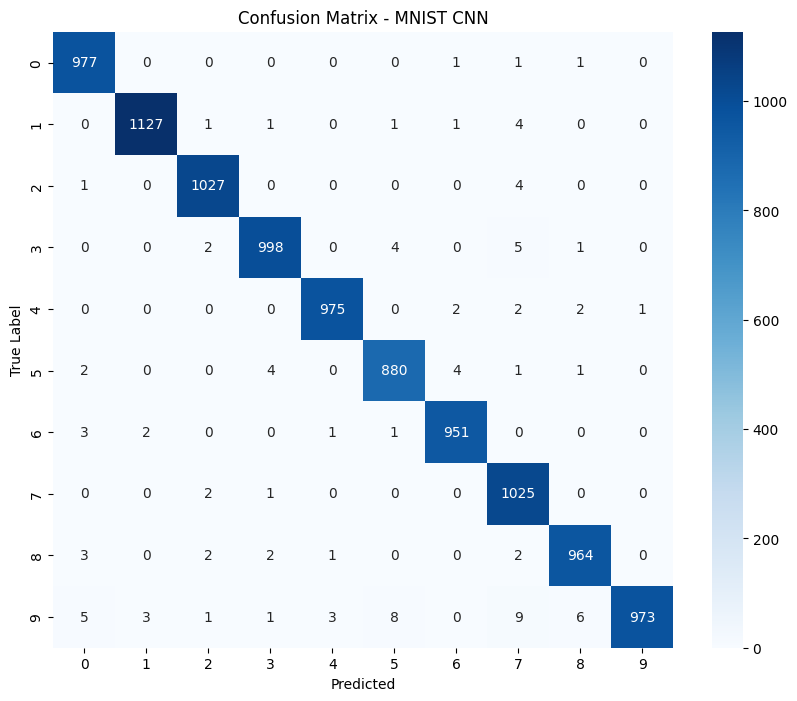

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN input (samples, width, height, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-Hot Encoding for the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=128, 
                    validation_split=0.1,
                    verbose=2)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST CNN')
plt.show()

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

